In [522]:
#import needed packages
import pandas as pd
from matplotlib import pyplot as plt

#Period from first infection measurement
START = 0
END = None

# Countries to use, leave array empty for all (not recommended)
WHITELIST = ['Netherlands', 'United Kingdom', 'Germany', 'Belgium', 'France']

#read all the data
total_cases_per_country = pd.read_csv('../datasets/total_cases_who_2020_03_18.csv')

In [523]:
#Now we calculate all growth factors for all countries
def calculate_growth(df: pd.DataFrame, name_col: str, count_col: str, whitelist: list):
    if len(whitelist) > 0:
        countries = [dict(zip(('name', 'series'), (c, []))) for c in df[name_col].unique() if c in whitelist]
    else:
        countries = [dict(zip(('name', 'series'), (c, []))) for c in df[name_col].unique()]

    for idx, rec in df.iterrows():
        for country in countries:
            if country['name'] == rec[name_col]:
                if rec[count_col] > 100:
                    if len(country['series']) == 0:
                        country['series'].append({
                            'day': 1, 
                            'total': rec[count_col], 
                            'new': rec[count_col],
                            'abs_growth': 1,
                            'rel_growth': 1
                        })
                    else:
                        prev = country['series'][len(country['series']) - 1]
                        
                        country['series'].append({
                            'day': prev['day'] + 1,
                            'new': rec[count_col] - prev['total'],
                            'total': rec[count_col],
                            'abs_growth': (rec[count_col] / prev['total']),
                            'rel_growth': (((rec[count_col] - prev['total']) / prev['new']) - 1) if prev['new'] != 0 else 0
                        })
                    
    return countries
    
    
#Now we create a new column for the average growth per day for both sets
total_growth = calculate_growth(total_cases_per_country,'Entity', 'Total confirmed cases of COVID-19', WHITELIST)


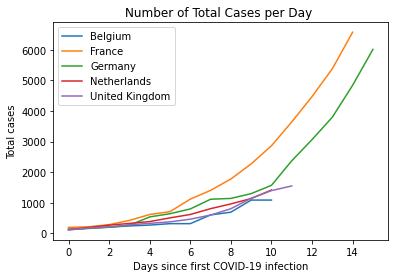

In [524]:
#total cases
for country in total_growth:
    total_cases = [rec['total'] for rec in country['series']][START:END]
    days = range(0, len(total_cases))
    plt.plot(days, total_cases , label = country['name'])

    if len(WHITELIST) == 1:
        avg = int(total_cases[-1] / 2)
        plt.plot(days, [avg for x in range(len(total_cases))] , 'r',label = f'Half: {format(avg, ".2f")}')

plt.xlabel('Days since first COVID-19 infection')
# Set the y axis label of the current axis.
plt.ylabel('Total cases')
# Set a title of the current axes.
plt.title('Number of Total Cases per Day ')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()


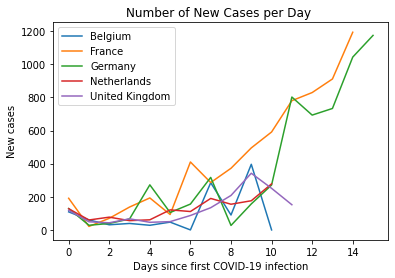

In [525]:
# Awesome! now we can visualize (with the all calculations done, and every datapoint available on the fly)

#new cases
for country in total_growth:
    new_cases = [rec['new'] for rec in country['series']][START:END]
    days = range(0, len(new_cases))
    plt.plot(days, new_cases , label = country['name'])
    if len(WHITELIST) == 1:
        avg = sum(new_cases) / len(new_cases) if len(new_cases) > 0 else 0
        plt.plot(days, [avg for x in range(len(new_cases))] , 'r',label = f'avg: {format(avg, ".2f")}') if len(new_cases) > 0 else 0
    
plt.xlabel('Days since first COVID-19 infection')
# Set the y axis label of the current axis.
plt.ylabel('New cases')
# Set a title of the current axes.
plt.title('Number of New Cases per Day ')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

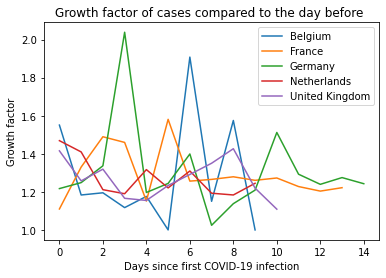

In [526]:
#absoulte growth
for country in total_growth:
    abs_growth = [rec['abs_growth'] for rec in country['series']][START + 1:END]
    days = range(0, len(abs_growth))
    plt.plot(days, abs_growth , label = country['name'])
    if len(WHITELIST) == 1:
        avg = sum(abs_growth) / len(abs_growth) if len(abs_growth) > 0 else 0
        plt.plot(days, [avg for x in range(len(abs_growth))] , 'r',label = f'avg: {format(avg, ".5f")}') if len(abs_growth) > 0 else 0

plt.xlabel('Days since first COVID-19 infection')
# Set the y axis label of the current axis.
plt.ylabel('Growth factor')
# Set a title of the current axes.
plt.title('Growth factor of cases compared to the day before ')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

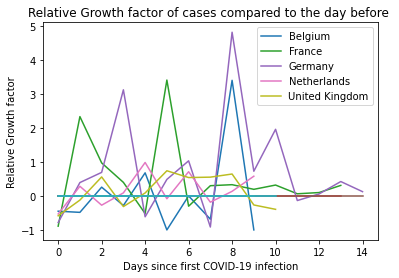

In [527]:
#absoulte growth
for country in total_growth:
    rel_growth = [rec['rel_growth'] for rec in country['series']][START + 1:END]
    days = range(0, len(rel_growth))
    if len(WHITELIST) == 1:
        plt.bar(days, rel_growth , label = country['name'])
    else:
        plt.plot(days, rel_growth , label = country['name'])
            
    plt.plot(days, [0 for x in range(len(rel_growth))])    
    
    if len(WHITELIST) == 1:
        avg = sum(rel_growth) / len(rel_growth) if len(rel_growth) > 0 else 0
        plt.plot(days, [avg for x in range(len(rel_growth))] , 'r',label = f'avg: {format(avg, ".5f")}') if len(rel_growth) > 0 else 0


plt.xlabel('Days since first COVID-19 infection')
# Set the y axis label of the current axis.
plt.ylabel('Relative Growth factor')
# Set a title of the current axes.
plt.title('Relative Growth factor of cases compared to the day before ')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

